In [7]:
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt

In [2]:
def generate_yt_url(id: str) -> str:
  return f"https://www.youtube.com/watch?v={id}"

def time_parser(time_scraped: str) -> int:
  total_duration_s = 0
  if time_scraped[:time_scraped.rindex('M')].isdigit():
    total_duration_s += int(time_scraped[:time_scraped.rindex('M')]) * 60
    if time_scraped[time_scraped.rindex('M')+1:-1].isdigit():
      total_duration_s += int(time_scraped[time_scraped.rindex('M')+1:-1])
  print(f'parsed {time_scraped} -> {total_duration_s}')
  return total_duration_s

In [3]:
path = '../datasets-yt-trending/US_youtube_trending_data_processed.csv'
df = pd.read_csv(path)

In [4]:
df['categoryId'].value_counts()

Music                    10441
Entertainment             9679
Gaming                    8286
Sports                    4723
People & Blogs            4114
Comedy                    2244
Film & Animation          1834
Science & Technology      1793
News & Politics           1308
Howto & Style             1127
Education                  914
Autos & Vehicles           554
Pets & Animals             196
Travel & Events             52
Nonprofits & Activism       39
Name: categoryId, dtype: int64

In [30]:
df['categoryId'].unique()

array(['People & Blogs', 'Gaming', 'Entertainment', 'Howto & Style',
       'Education', 'Music', 'Science & Technology', 'Film & Animation',
       'Comedy', 'News & Politics', 'Sports', 'Autos & Vehicles',
       'Pets & Animals', 'Nonprofits & Activism', 'Travel & Events'],
      dtype=object)

In [5]:
new_df = df.groupby("categoryId").sample(n=4)

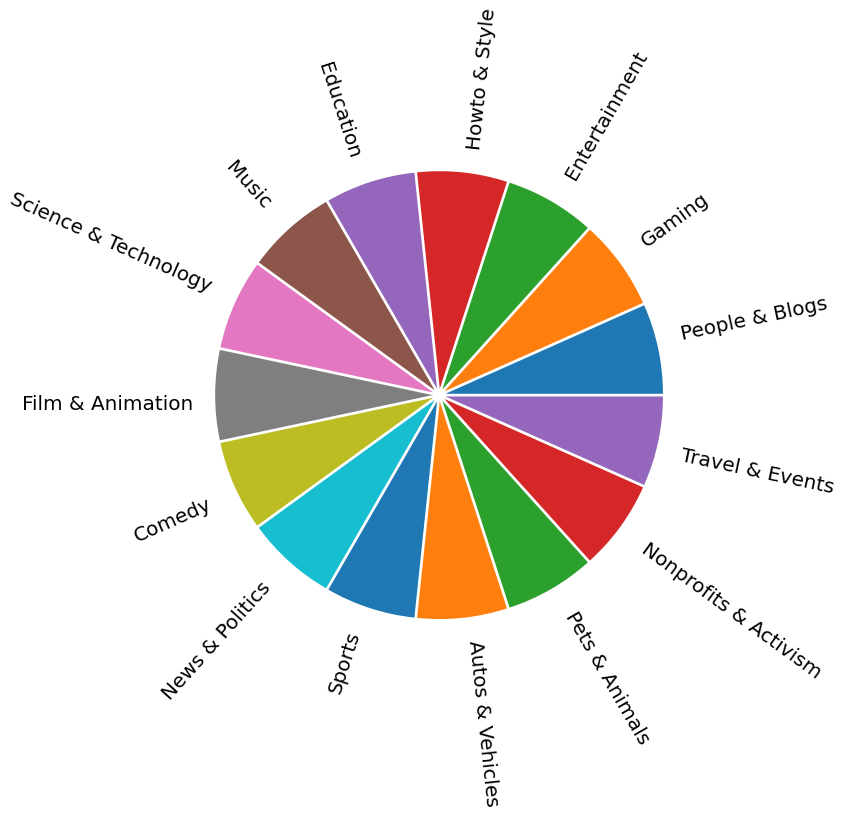

In [41]:


fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
_ =plt.pie(new_df['categoryId'].value_counts(), labels=df['categoryId'].unique(), labeldistance=1.1, textprops={'size': 20}, rotatelabels=1, explode=[0.03]*15)
fig.savefig('dataset_pie.svg', dpi=400)

In [10]:
meta_tag_pattern = "<meta itemprop=\"%s\" content=\"(.*?)\">"

responce = requests.get(url=generate_yt_url('j5bEQC6TTeM'))
scraped = re.search(meta_tag_pattern % 'duration', str(responce.content)).groups()
time_scraped = scraped[0].replace("PT","")
time_parser(time_scraped)

parsed 28M15S -> 1695


1695

In [11]:
duration_col = []

for rowi in range(new_df.shape[0]):
  print(rowi,end=", ")
  _id = new_df.iloc[[rowi]]['video_id'].item()
  responce = requests.get(url=generate_yt_url(_id))
  scraped = re.search(meta_tag_pattern % 'duration', str(responce.content))
  print(_id)
  if scraped:
    scraped = scraped.groups()
    time_scraped = scraped[0].replace("PT","")  
    duration_col.append(time_parser(time_scraped))
  else:
    duration_col.append(0)

0, Cdsf75RB3LM
parsed 18M59S -> 1139
1, YIs8t3ro9Fw
parsed 5M7S -> 307
2, oj9y7Okr4Fk
parsed 14M43S -> 883
3, HwLvqvcWEos
parsed 1M32S -> 92
4, BxWw8AO4ZmI
parsed 8M39S -> 519
5, JlazW6xJMEM
parsed 16M35S -> 995
6, R84W2hbmaKk
parsed 9M38S -> 578
7, Khsssa7xCR8
parsed 30M31S -> 1831
8, QqsLTNkzvaY
parsed 12M15S -> 735
9, gLZJlf5rHVs
parsed 9M46S -> 586
10, zTyZgOkWs4o
parsed 26M35S -> 1595
11, 4b33NTAuF5E
parsed 13M58S -> 838
12, JD-CsaaRpk4
parsed 13M1S -> 781
13, _-wgA69ZVcU
parsed 4M15S -> 255
14, y34p0I3ULX4
parsed 18M42S -> 1122
15, Nx1Jp2U23PM
parsed 16M33S -> 993
16, cb1LWdUHxHs
parsed 2M51S -> 171
17, DmtvBzuv_Fw
parsed 32M33S -> 1953
18, TjbiHveOpGs
parsed 3M12S -> 192
19, sS6ksY8xWCY
parsed 2M26S -> 146
20, ddcz4b2XIyo
parsed 1M1S -> 61
21, mpaJorsxW7k
parsed 22M41S -> 1361
22, gEOI-Ae_aaU
parsed 5M10S -> 310
23, rXRQyd6_5j4
parsed 3M18S -> 198
24, p4Wy84AOzj0
parsed 11M0S -> 660
25, hafxbLTr3M4
parsed 12M39S -> 759
26, TT4AffJJugs
parsed 15M39S -> 939
27, BtHhKiQgdeM
parsed 

In [12]:
new_df['duration'] = duration_col

In [48]:
duration_col

[1118,
 138,
 1330,
 2240,
 1090,
 1228,
 156,
 1038,
 21,
 997,
 1040,
 990,
 697,
 1208,
 480,
 219,
 1913,
 169,
 613,
 257,
 176,
 107,
 253,
 1281,
 199,
 694,
 1487,
 587,
 584,
 852,
 219,
 694,
 479,
 493,
 994,
 2603,
 777,
 276,
 10,
 615,
 224,
 870,
 226,
 1356,
 74,
 96,
 100,
 279,
 905,
 263,
 283,
 174,
 499,
 3810,
 208,
 967,
 668,
 273,
 247,
 1344,
 140,
 243,
 1123,
 908,
 382,
 1342,
 150,
 73,
 232,
 584,
 287,
 231,
 196,
 396,
 197,
 1026,
 76,
 271,
 236,
 489,
 43,
 199,
 191,
 177,
 0,
 182,
 577,
 85,
 546,
 640,
 299,
 296,
 1118,
 1330,
 138,
 2240,
 264,
 1491,
 219,
 605,
 647,
 1090,
 1228,
 156,
 602,
 1038,
 21,
 990,
 997,
 551,
 697,
 1208,
 480,
 1303,
 176,
 169,
 1913,
 257,
 1040,
 613]

In [44]:

new_df.to_csv('YT_data_60_equalized.csv')